## Exploratory Data Analysis of Real Estate Listings in Manhattan  



### Introduction  

Using Python's Scrapy package, the goal of this project was to conduct an exploratory data analysis of on residential real estate lisitngs in Manhattan. The EDA aims to answer three questions regarding real-estate listings:  

- What are some of the general trends in real-estate listings in Manhattan? 
- What factors can affect the price of a Manhattan listing?   
- How affordable and financially feasible is purchasing resdiential real-estate for the average New Yorker?  

The data for this project was scrapped from Realtor.com and consists of 1663 individual listings containing information on the street address, price, number of bath & bedrooms, property type, and square footage. 

In [6]:
#loading libraries and dataset 
import pandas as pd 
import numpy as np  
from scipy import stats  
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline 

plt.style.use('ggplot') 
df = pd.read_csv("real_estate_data.csv") 
df = df.drop("Unnamed: 0", axis = 1)  
df['property_type'] = df['property_type'].str.replace('Condop', 'Condo').str.replace('Townhome','Townhouse')
df['total_rooms'] =  df['baths'] + df['beds'] 
sns.set_style("whitegrid")

### Part I: Overview of the Data 

Text(0, 0.5, 'Counts')

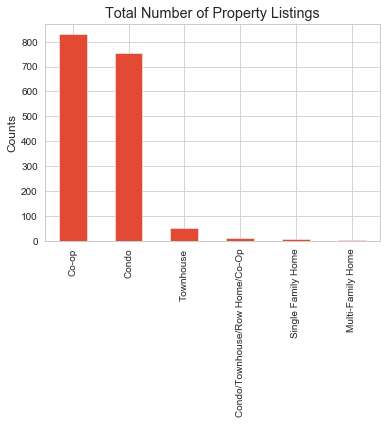

In [9]:
df['property_type'].value_counts().plot.bar() 
plt.title("Total Number of Property Listings") 
plt.ylabel("Counts")

Text(0, 0.5, '')

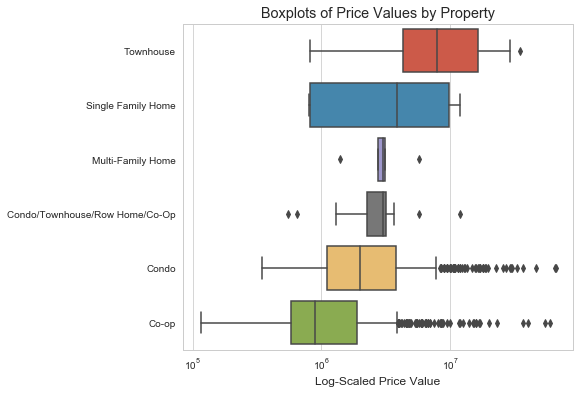

In [10]:
f, ax = plt.subplots(figsize=(7, 6))
m_order = df.groupby(by=['property_type'])['price'].median().sort_values(ascending=False).index
sns.set_style("whitegrid")
ax =sns.boxplot(x="price", y="property_type", data=df, order = m_order ) 
ax.set_xscale('log')
ax.set_title('Boxplots of Price Values by Property')
ax.set_xlabel('Log-Scaled Price Value')
ax.set_ylabel('')

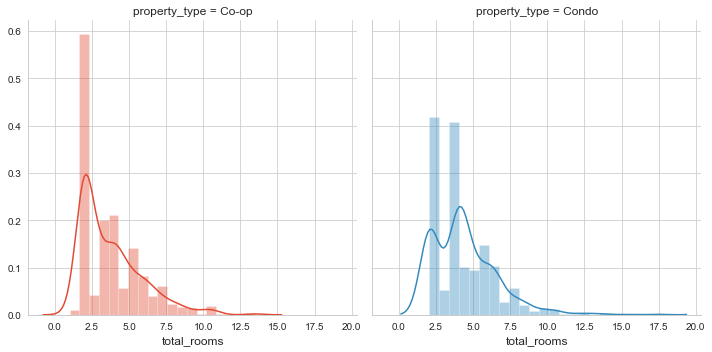

In [14]:
major_props = ['Co-op', 'Condo']
df_filt = df[df['property_type'].isin(major_props)] 
plotgrid = sns.FacetGrid(df_filt, col = "property_type", hue = "property_type", height = 5) 
plotgrid.map(sns.distplot, 'total_rooms') 


C:\Users\bpj25\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0, 0.5, '')

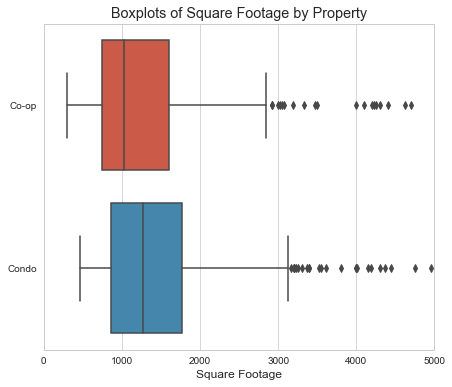

In [30]:
#sqft by house type 
df_sqft = df_filt.dropna(axis = 0, how = 'any') 
sqft = df_sqft['sqft'].str.replace(',','')
df_sqft['sqft'] = [int(x) for x in sqft]

f, ax = plt.subplots(figsize=(7, 6))
sns.set_style("whitegrid")
ax =sns.boxplot(x="sqft", y="property_type", data=df_sqft) 
ax.set_title('Boxplots of Square Footage by Property')
ax.set(xlim = (0, 5000))
ax.set_xlabel("Square Footage")
ax.set_ylabel('')


### Part 2:  Factors Affecting Listing Price 

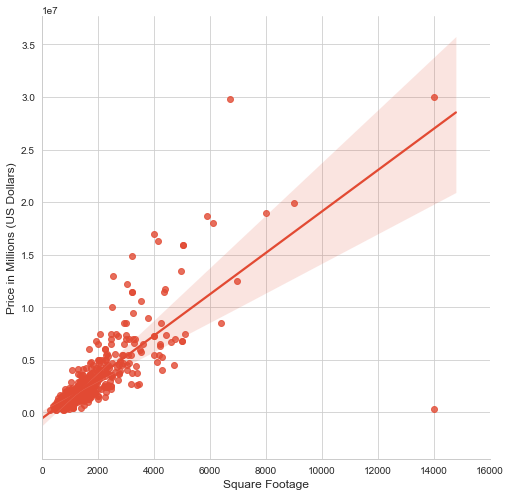

In [39]:
ax = sns.lmplot('sqft', 'price', df_sqft, height = 7)
ax.set(xlim = (0,16000))
ax.set_axis_labels('Square Footage', 'Price in Millions (US Dollars)')


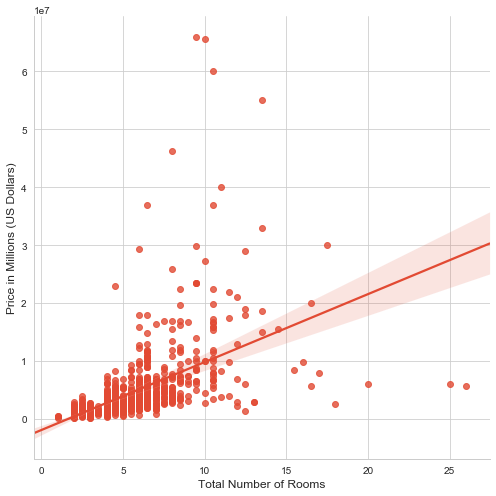

In [40]:
ax = sns.lmplot('total_rooms', 'price', df, height =7) 
ax.set_axis_labels('Total Number of Rooms', 'Price in Millions (US Dollars)')

In [46]:
corr_table = df_sqft.corr(method = 'pearson') 
corr_table[['price']] 

,price
baths,0.769648
beds,0.663955
price,1.000000
sqft,0.807260
year_built,0.049267
zipcode,-0.015051
high_payment,1.000000
low_payment,1.000000
low_monthly,1.000000
high_monthly,1.000000


### Part 3: Finances of Purchasing

Text(0.5, 1.0, 'Boxplots Comparing Mortgage Rates')

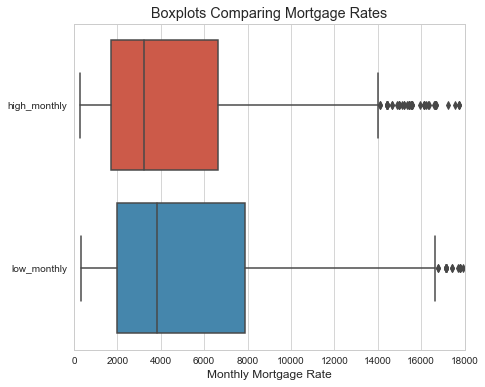

In [57]:
df_payments = df[['high_monthly', 'low_monthly']]
df_mort = df_payments.melt(value_vars = ['high_monthly', 'low_monthly'], value_name = 'monthly_mortgage')   
f, ax = plt.subplots(figsize=(7, 6))
ax = sns.boxplot(x="monthly_mortgage", y="variable", data=df_mort)
ax.set(xlim=(0, 18000))
ax.set_ylabel('')
ax.set_xlabel('Monthly Mortgage Rate')
ax.set_title('Boxplots Comparing Mortgage Rates')

Text(0.5, 1.0, 'Comparrsion of Recommended Yearly Salaries')

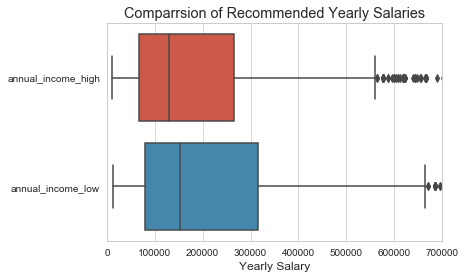

In [71]:
df_salary = df[['annual_income_high', 'annual_income_low']] 
df_sals = df_salary.melt(value_vars= ['annual_income_high', 'annual_income_low'], value_name = 'annual_income') 
ax = sns.boxplot(x="annual_income", y="variable", data=df_sals)
ax.set(xlim=(0,700000))
ax.set_xlabel("Yearly Salary")
ax.set_ylabel('') 
ax.set_title('Comparrsion of Recommended Yearly Salaries')
